In [1]:
import os
os.getcwd()

'C:\\Users\\user\\Desktop\\Projects'

In [60]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import sklearn
import scipy

from pylab import rcParams
rcParams['figure.figsize'] = 16,12
RANDOM_SEED = 101
LABELS = ['Normal', 'Fraud']

In [3]:
# import the dataset
data = pd.read_csv('CreditCard.csv', sep=',')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# Data Preprocessing : check missing data 
data.isnull().sum()
data.isnull().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
#Check imbalance dataset
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

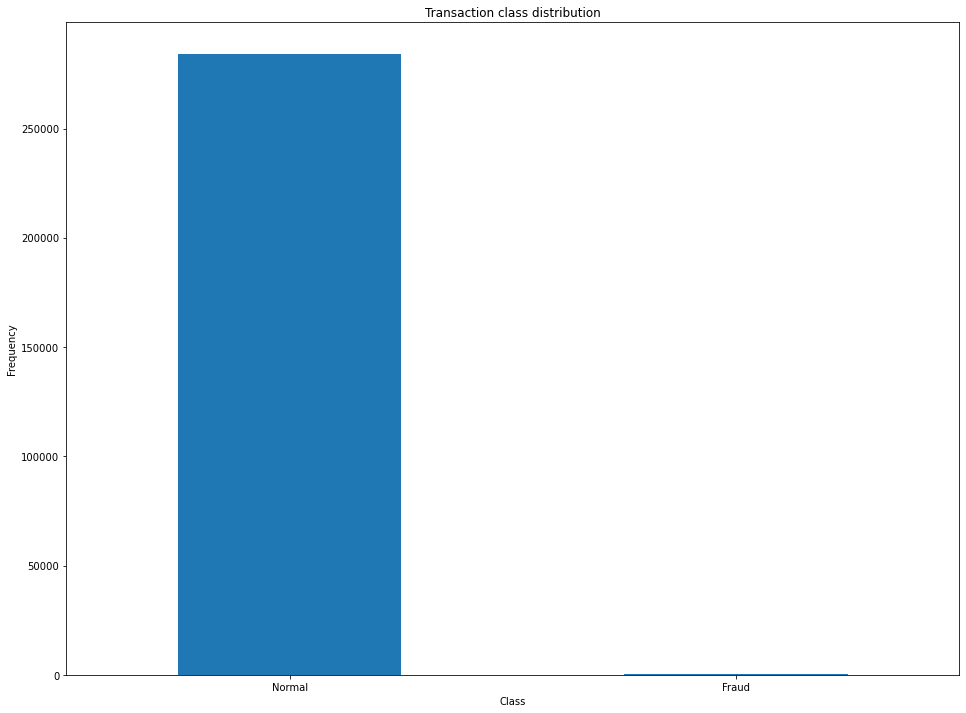

In [7]:
# EDA - Exploratory data analysis
count_classes = pd.value_counts(data['Class'], sort=True)
count_classes.plot(kind = 'bar', rot = 0)
plt.title("Transaction class distribution")
plt.xticks(range(2), LABELS)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

In [8]:
fraud = data[data['Class']==1]
normal = data[data['Class']==0]

print(fraud.shape, normal.shape)

(492, 31) (284315, 31)


In [9]:
outlier_fraction = len(fraud)/float(len(normal))
outlier_fraction

0.0017304750013189597

In [10]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [11]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

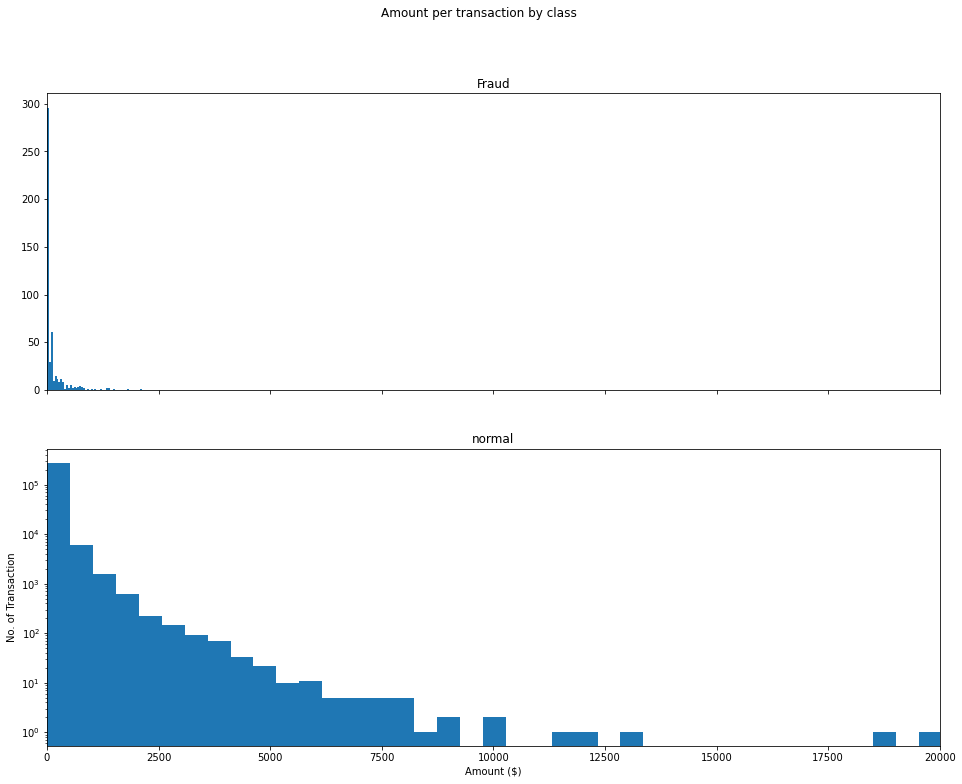

In [12]:
f, (ax1, ax2) = plt.subplots(2,1, sharex = True)
f.suptitle("Amount per transaction by class")
bins = 50
ax1.hist(fraud.Amount, bins=bins)
ax1.set_title('Fraud')

ax2.hist(normal.Amount, bins=bins)
ax2.set_title('normal')

plt.xlabel("Amount ($)")
plt.ylabel("No. of Transaction")

plt.xlim(0,20000)
plt.yscale('log')
plt.show()

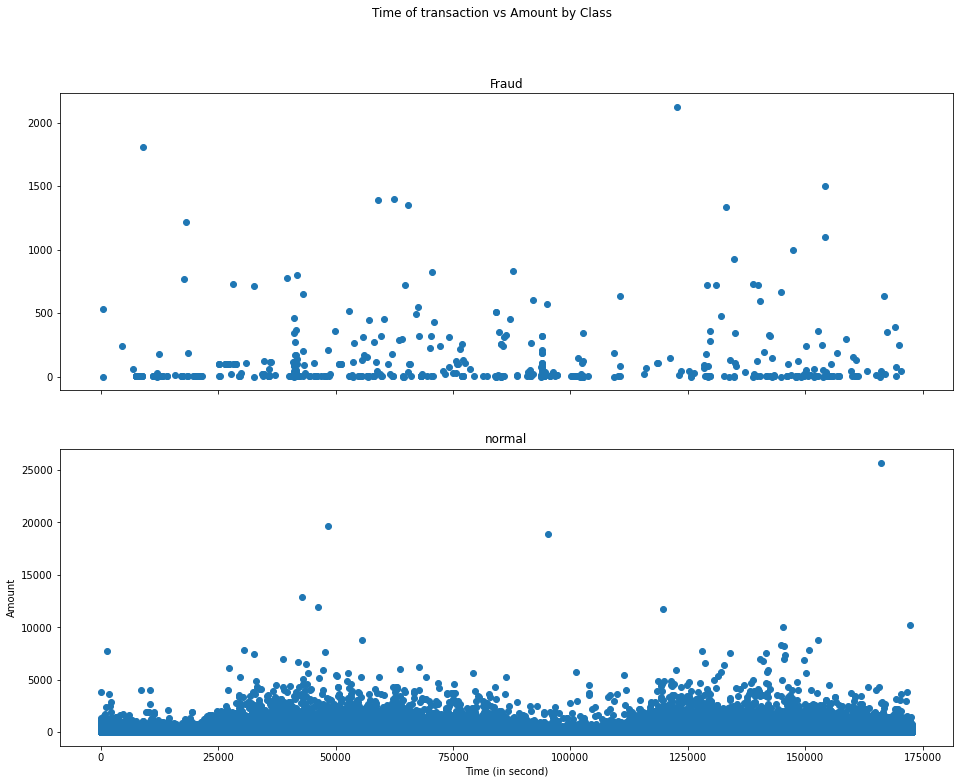

In [13]:
f, (ax1, ax2) = plt.subplots(2,1, sharex = True)
f.suptitle("Time of transaction vs Amount by Class")

ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')

ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('normal')

plt.xlabel("Time (in second)")
plt.ylabel("Amount")

plt.show()

<AxesSubplot:xlabel='Time', ylabel='Density'>

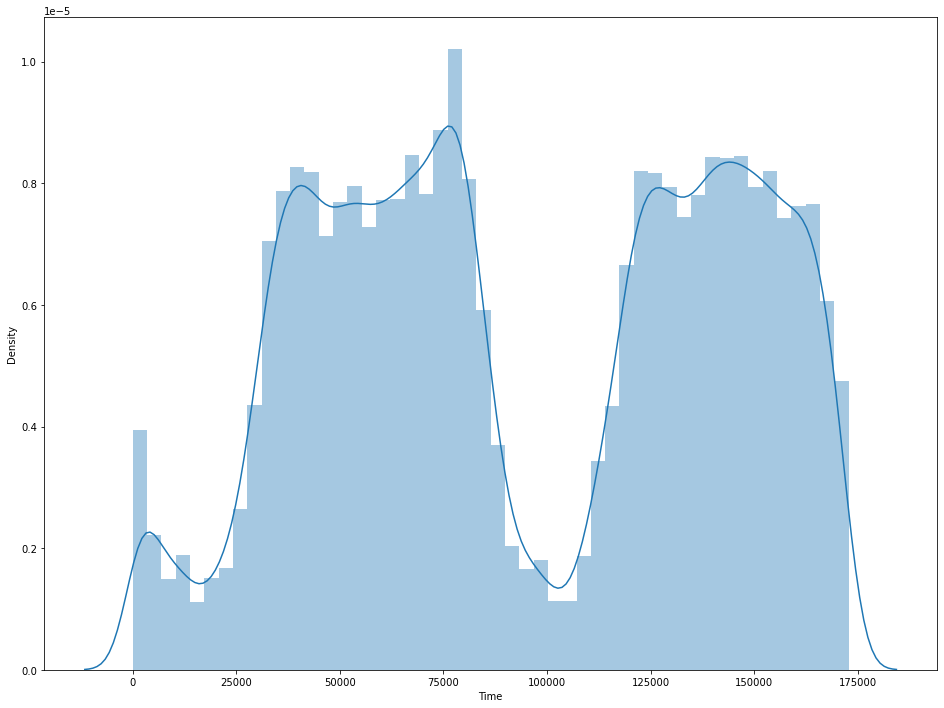

In [14]:
sns.distplot(data['Time'])

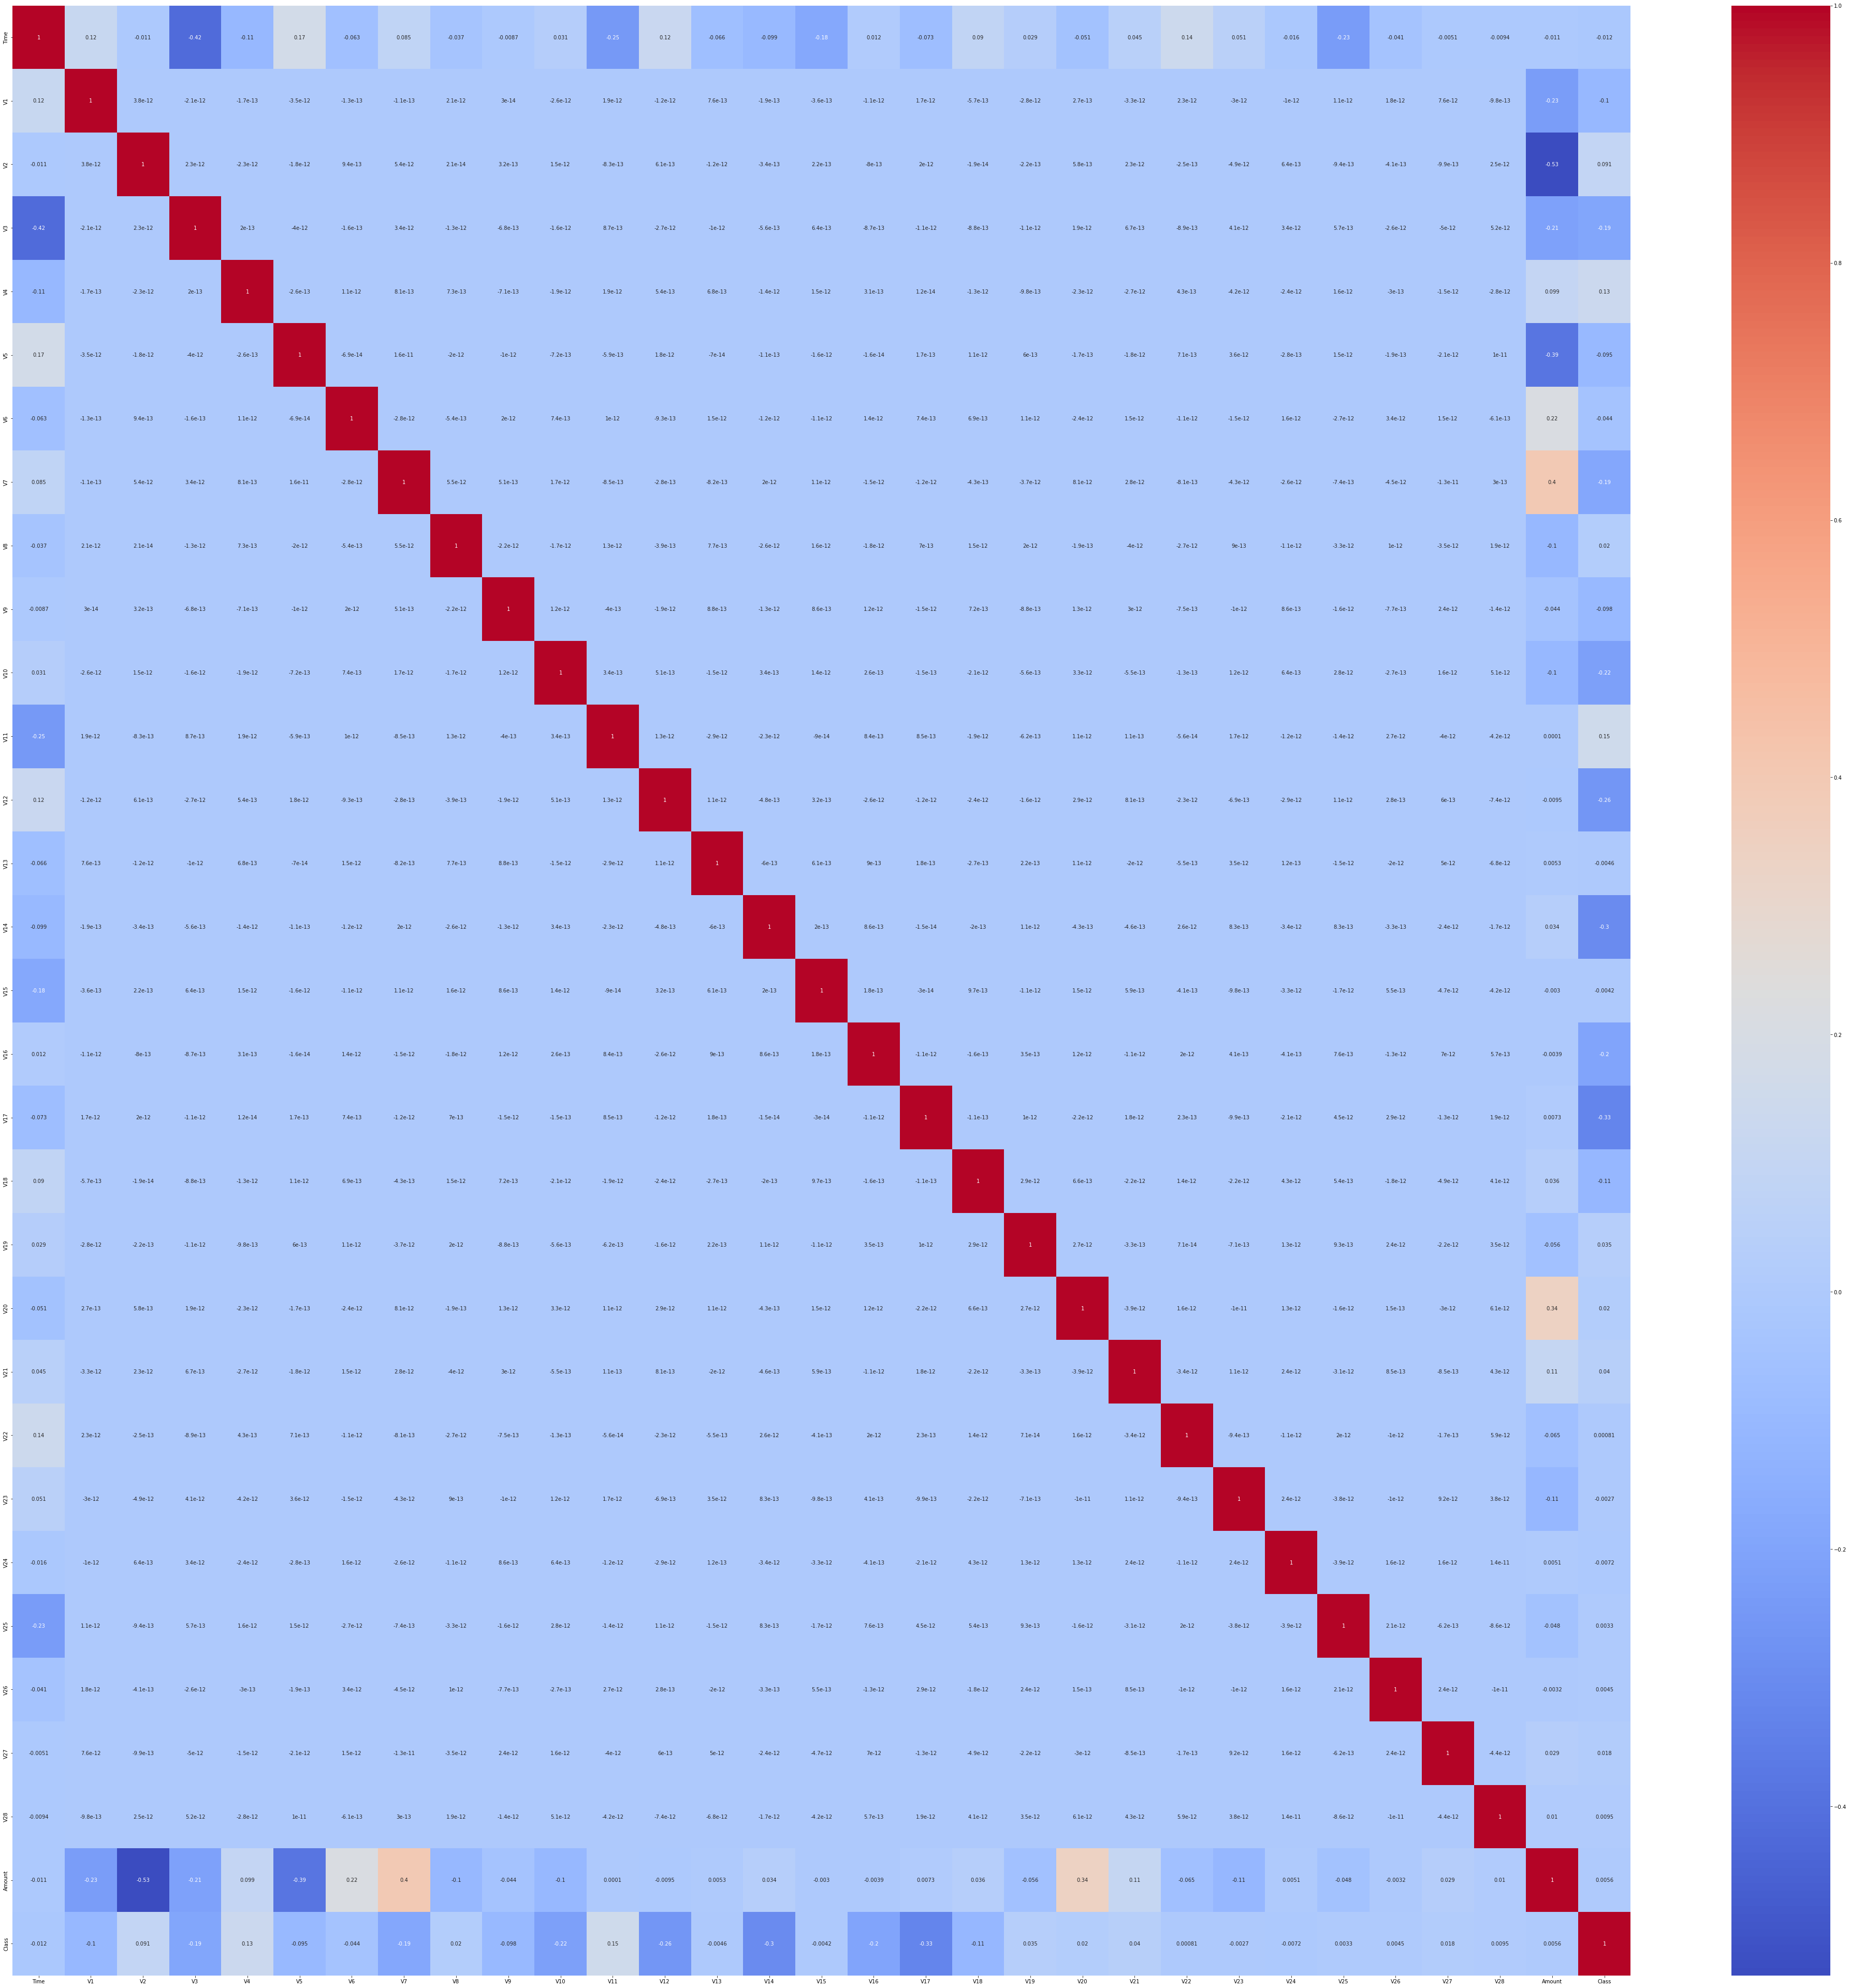

In [15]:
# Correlation : Heat Map

corrmat = data.corr()
top_corr_feature= corrmat.index
plt.figure(figsize = (70,70))
k = sns.heatmap(data[top_corr_feature].corr(), annot = True, cmap = 'coolwarm')

In [16]:
columns  = data.columns.tolist()
columns

['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount',
 'Class']

In [17]:
# split the data into target and feature varibales
columns = [c for c in columns if c not in ['Class']]
target = 'Class'

In [18]:
columns

['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount']

In [19]:
target

'Class'

In [20]:
columns = [c for c in columns if c not in ['Class']]
target = 'Class'
state = np.random.RandomState(52)
x = data[columns]
y = data[target]
x_outlier = state.uniform(low = 0, high = 1, size = (x.shape[0], x.shape[1]))
print(x.shape)
print(y.shape)

(284807, 30)
(284807,)


In [21]:
# Split the data into train and test for building the model and prediction

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.70, random_state= 101)

In [23]:
x_train.shape

(199364, 30)

In [24]:
x_test.shape

(85443, 30)

# Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
logit =LogisticRegression()
logit = logit.fit(x_train,y_train)

In [26]:
y_pred_train = logit.predict(x_train)
y_pred_test = logit.predict(x_test)

In [27]:
from sklearn.metrics import accuracy_score , confusion_matrix, classification_report

In [28]:
print(classification_report(y_train, y_pred_train))
print ('*'*70)
print (classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199016
           1       0.71      0.55      0.62       348

    accuracy                           1.00    199364
   macro avg       0.86      0.77      0.81    199364
weighted avg       1.00      1.00      1.00    199364

**********************************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85299
           1       0.71      0.54      0.61       144

    accuracy                           1.00     85443
   macro avg       0.85      0.77      0.81     85443
weighted avg       1.00      1.00      1.00     85443



In [29]:
print(confusion_matrix(y_train, y_pred_train))
print ('*'*75)
print (confusion_matrix(y_test, y_pred_test))

[[198939     77]
 [   157    191]]
***************************************************************************
[[85267    32]
 [   66    78]]


In [30]:
print(accuracy_score(y_train, y_pred_train))
print ('*'*75)
print (accuracy_score(y_test, y_pred_test))

0.9988262675307478
***************************************************************************
0.9988530365272755


In [31]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion = 'entropy')
dtree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [32]:
y_pred_dt_train = dtree.predict(x_train)
y_pred_dt_test = dtree.predict(x_test)

In [33]:
print(accuracy_score(y_train, y_pred_dt_train))
print ('*'*75)
print (accuracy_score(y_test, y_pred_dt_test))

1.0
***************************************************************************
0.9992743700478681


In [34]:
print(confusion_matrix(y_train, y_pred_dt_train))
print ('*'*75)
print (confusion_matrix(y_test, y_pred_dt_test))

[[199016      0]
 [     0    348]]
***************************************************************************
[[85268    31]
 [   31   113]]


In [35]:
print(classification_report(y_train, y_pred_dt_train))
print ('*'*70)
print (classification_report(y_test, y_pred_dt_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199016
           1       1.00      1.00      1.00       348

    accuracy                           1.00    199364
   macro avg       1.00      1.00      1.00    199364
weighted avg       1.00      1.00      1.00    199364

**********************************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85299
           1       0.78      0.78      0.78       144

    accuracy                           1.00     85443
   macro avg       0.89      0.89      0.89     85443
weighted avg       1.00      1.00      1.00     85443



In [36]:
from sklearn import tree

<function matplotlib.pyplot.show(close=None, block=None)>

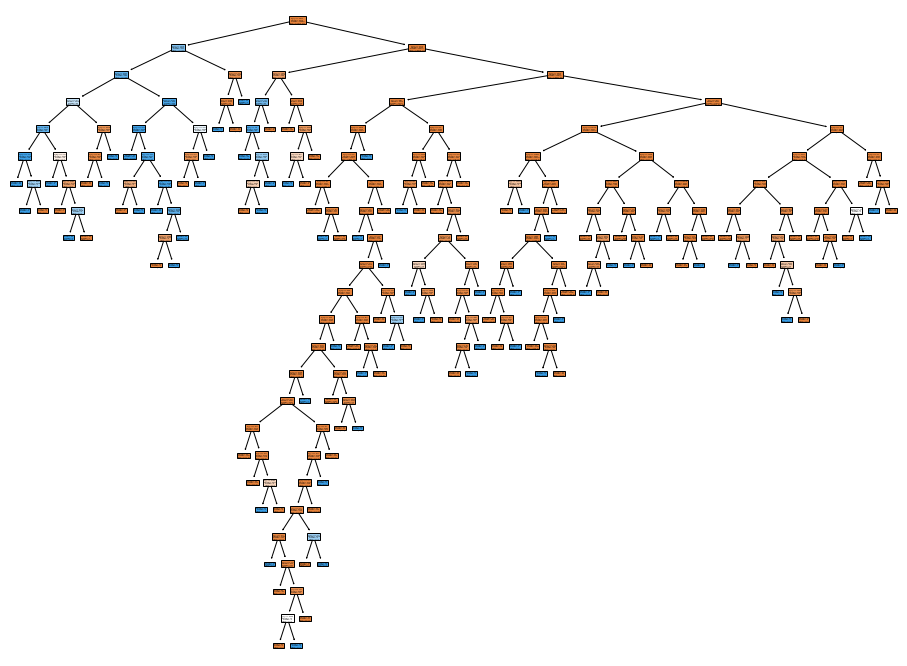

In [37]:
tree.plot_tree(dtree, filled= True)
plt.show

In [38]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 500, criterion='entropy')
rfc.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=500)

In [39]:
y_pred_rfc_train = rfc.predict(x_train)
y_pred_rfc_test = rfc.predict(x_test)

In [79]:
print(accuracy_score(y_train, y_pred_rfc_train))
print ('*'*75)
print (accuracy_score(y_test, y_pred_rfc_test))

1.0
***************************************************************************
0.9995552590615966


In [41]:
print(confusion_matrix(y_train, y_pred_rfc_train))
print ('*'*75)
print (confusion_matrix(y_test, y_pred_rfc_test))

[[199016      0]
 [     0    348]]
***************************************************************************
[[85292     7]
 [   31   113]]


In [42]:
print(classification_report(y_train, y_pred_rfc_train))
print ('*'*70)
print (classification_report(y_test, y_pred_rfc_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199016
           1       1.00      1.00      1.00       348

    accuracy                           1.00    199364
   macro avg       1.00      1.00      1.00    199364
weighted avg       1.00      1.00      1.00    199364

**********************************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85299
           1       0.94      0.78      0.86       144

    accuracy                           1.00     85443
   macro avg       0.97      0.89      0.93     85443
weighted avg       1.00      1.00      1.00     85443



# XGBoost

In [69]:
!pip install xgboost

In [73]:
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier()
xgb_classifier.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [76]:
y_pred_xgb_train = xgb_classifier.predict(x_train)
y_pred_xgb_test = xgb_classifier.predict(x_test)

In [80]:
print(accuracy_score(y_train, y_pred_xgb_train))
print ('*'*75)
print (accuracy_score(y_test, y_pred_xgb_test))

1.0
***************************************************************************
0.9995786664794073


In [81]:
print(confusion_matrix(y_train, y_pred_xgb_train))
print ('*'*75)
print (confusion_matrix(y_test, y_pred_xgb_test))

[[199016      0]
 [     0    348]]
***************************************************************************
[[85291     8]
 [   28   116]]


In [82]:
print(classification_report(y_train, y_pred_xgb_train))
print ('*'*70)
print (classification_report(y_test, y_pred_xgb_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199016
           1       1.00      1.00      1.00       348

    accuracy                           1.00    199364
   macro avg       1.00      1.00      1.00    199364
weighted avg       1.00      1.00      1.00    199364

**********************************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85299
           1       0.94      0.81      0.87       144

    accuracy                           1.00     85443
   macro avg       0.97      0.90      0.93     85443
weighted avg       1.00      1.00      1.00     85443



# Stacking Classfier

In [49]:
!pip install mlxtend

In [83]:
from mlxtend.classifier import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [100]:
from sklearn.model_selection import cross_val_score

clf1 = KNeighborsClassifier(n_neighbors=5)
clf2 = GaussianNB()
clf3 = RandomForestClassifier()
clf4 = XGBClassifier()
clf5 = LogisticRegression()
sclf = StackingClassifier(classifiers = [clf1,clf2,clf3,clf4], meta_classifier=clf5)

print('3-fold cross validation : \n')

for clf,label in zip([clf1,clf2,clf3,clf4,sclf], ['KNN', 'Naive Bayes', 'Random Forest', 'XGBoost', 'Stacking Classfier']):
    scores = cross_val_score(clf, x, y, cv=3, scoring = 'accuracy')
    print ('Accuracy : %0.2f (+/-%0.2f)[%s]' % (scores.mean(), scores.std(), label))


3-fold cross validation : 

Accuracy : 0.49 (+/-0.40)[KNN]
Accuracy : 0.99 (+/-0.00)[Naive Bayes]
Accuracy : 0.67 (+/-0.47)[Random Forest]
Accuracy : 0.96 (+/-0.05)[XGBoost]
Accuracy : 0.96 (+/-0.05)[Stacking Classfier]


# IsolationForest, LocalOutlierFactor

In [101]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

In [102]:
Classification = {'Isolation Forest': IsolationForest(n_estimators =100, max_samples = len(x),contamination = outlier_fraction),
                 "Local Outlier Factor" : LocalOutlierFactor(n_neighbors = 20, contamination = outlier_fraction),
                 'One Class SVM' : OneClassSVM()}

In [ ]:
n_outlier =len(fraud)

for i, (clf_name, clf) in enumerate(Classification.items()):
    if clf_name == 'Local Outlier Factor' : 
        y_pred = clf.fit_predict(x) 
        score_prediction = clf.negative_outlier_factor_
    elif clf_name == "One Class SVM" : 
        clf.fit(x)
        y_pred = clf.predict(x)
        
    else:
        clf.fit(x)
        score_prediction = clf.decision_function(x)
        y_pred = clf.predict(x)
        
    y_pred[y_pred==1] = 0
    y_pred[y_pred == -1] = 1
    n_error = (y_pred !=y).sum()

    print("{}, {}".format(clf_name, n_error)) 
    print("Accuracy Score :")

    print(accuracy_score (y, y_pred))
    print("Classification Report :")
    print(classification_report (y, y_pred))

Isolation Forest, 651
Accuracy Score :
0.9977142415741186
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.34      0.34      0.34       492

    accuracy                           1.00    284807
   macro avg       0.67      0.67      0.67    284807
weighted avg       1.00      1.00      1.00    284807

